In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-krylov-power)=
# Power iteration

```{index} sparse matrix
```

Given that matrix-vector multiplication is fast for sparse matrices, let's see what we might accomplish with only that at our disposal.

(demo-power-one)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

Here we choose a random 5×5 matrix and a random 5-vector.

In [2]:
A = rand(1.:9.,5,5)
A = A./sum(A,dims=1)
x = randn(5)

5-element Vector{Float64}:
  0.425781202469713
 -0.5205355821472383
  0.7579623174056564
  1.2660763121739163
 -1.3063430455782654

Applying matrix-vector multiplication once doesn't do anything recognizable.

In [3]:
y = A*x

5-element Vector{Float64}:
  0.06207777505990392
  0.17097054226012237
  0.270047544447043
 -0.052553182031896906
  0.1723985245886096

Repeating the multiplication still doesn't do anything obvious.

In [4]:
z = A*y

5-element Vector{Float64}:
 0.1390817587106179
 0.09320200009545425
 0.0988458893342177
 0.13047409038352917
 0.16133746579996294

But if we keep repeating the matrix-vector multiplication, something remarkable happens: $\mathbf{A} \mathbf{x} \approx \mathbf{x}$.

In [5]:
for j in 1:8;  x = A*x;  end
[x A*x]

5×2 Matrix{Float64}:
 0.154275  0.154275
 0.10942   0.109421
 0.108751  0.108752
 0.120164  0.120161
 0.130332  0.130332

This phenomenon seems to occur regardless of the starting vector.

In [6]:
x = randn(5)
for j in 1:8;  x = A*x;  end
[x A*x]

5×2 Matrix{Float64}:
 0.134334   0.134337
 0.0952766  0.0952794
 0.0946953  0.0946971
 0.104639   0.10463
 0.113487   0.113488

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

There was a little cheating in {numref}`Demo %s <demo-power-one>` to make the story come out neatly (specifically, the line `A=A./sum(A,dims=1)`). But it illustrates an important general fact that we investigate now.

## Dominant eigenvalue

```{index} ! eigenvalue; dominant
```
Analysis of matrix powers is most straightforward in the diagonalizable case. Let $\mathbf{A}$ be any diagonalizable $n\times n$ matrix having eigenvalues $\lambda_1,\ldots,\lambda_n$ and corresponding linearly independent eigenvectors $\mathbf{v}_1,\ldots,\mathbf{v}_n$. Furthermore, suppose the eigenvalues are such that

:::{math}
:label: evorder
|\lambda_1| > |\lambda_2| \ge |\lambda_3| \ge \cdots \ge |\lambda_n|.
:::

Given {eq}`evorder` we say that $\lambda_1$ is the **dominant eigenvalue**. This was the case with $\lambda_1=1$ for $\mathbf{A}$ in {numref}`Demo %s <demo-power-one>`.

Now let $\mathbf{x}$ be an $n$-vector, let $k$ be a positive integer, and refer to {eq}`evdpower`: 

:::{math}
\mathbf{A}^k \mathbf{x} = \mathbf{V}\mathbf{D}^k\mathbf{V}^{-1}\mathbf{x}.
:::

Let $\mathbf{z}=\mathbf{V}^{-1}\mathbf{x}$, and recall that $\mathbf{D}$ is a diagonal matrix of eigenvalues. Then

::::{math}
:label: powerAkx0
\begin{split}
  \mathbf{A}^k\mathbf{x} &= \mathbf{V}\mathbf{D}^k \mathbf{z} = \mathbf{V}\begin{bmatrix} \lambda_1^kz_1 \\[0.5ex] \lambda_2^kz_2 \\ \vdots \\ \lambda_n^kz_n \end{bmatrix} \\
	&= \lambda_1^k \left[ z_1 \mathbf{v}_{1} +
		z_2 \left(\frac{\lambda_2}{\lambda_1}\right) ^k 
		\mathbf{v}_{2} + \cdots + z_n \left(\frac{\lambda_n}{\lambda_1}\right)^k
		\mathbf{v}_{n} \right].
\end{split}
::::

Since $\lambda_1$ is dominant, we conclude that if $z_1\neq 0$,

:::{math}
:label: poweriterconverge
\left\| \frac{ \mathbf{A}^k\mathbf{x}}{\lambda_1^k}
- z_1\mathbf{v}_1\right\| \le |z_2|\cdot\left|\frac{\lambda_2}{\lambda_1}\right| ^k
\| \mathbf{v}_{2} \| + \cdots +  |z_n|\cdot\left|\frac{\lambda_n}{\lambda_1}\right|^k
\| \mathbf{v}_{n} \| \rightarrow 0 \text{ as $k\rightarrow \infty$}.
:::

That is, $\mathbf{A}^k\mathbf{x}$ eventually is a scalar multiple of the dominant eigenvector.[^zeromeasure]

[^zeromeasure]: If $\mathbf{x}$ is chosen randomly, the probability that $z_1=0$ is mathematically zero.

:::{attention}
For algorithmic purposes, it is important to interpret $\mathbf{A}^k\mathbf{x}$ as $\mathbf{A}\bigl( \cdots\bigl( \mathbf{A} (\mathbf{A}\mathbf{x})\bigl) \cdots\bigl)$, i.e., as repeated applications of $\mathbf{A}$ to a vector. Doing so allows us to fully exploit sparsity of $\mathbf{A}$, something which is not preserved by taking a matrix power $\mathbf{A}^k$ explicitly before the multiplication with $\mathbf{x}$ (see {numref}`Demo {number} <demo-structure-fill>`).
:::
## Power iteration

An important technicality separates us from an algorithm: unless $|\lambda_1|=1$, the factor $\lambda_1^k$ tends to make $\|\mathbf{A}^k\mathbf{x}\|$ either very large or very small. Nor can we easily normalize by $\lambda_1^k$, as in {eq}`poweriterconverge`, unless we know $\lambda_1$ in advance.

To make a practical algorithm, we alternate matrix-vector multiplication with a renormalization of the vector. In the following, we use $x_{k,m}$ and $y_{k,m}$ to mean the $m$th component of vectors $\mathbf{x}_k$ and $\mathbf{y}_k$.

```{index} ! power iteration
```

(algorithm-power-power)=
::::{proof:algorithm} Power iteration
Given matrix $\mathbf{A}$:

1. Choose $\mathbf{x}_1$.
2. For $k=1,2,\ldots$, 
   
    a. Set $\mathbf{y}_k = \mathbf{A} \mathbf{x}_k$.
	
    b. Find $m$ such that $|y_{k,m}|=\|{\mathbf{y}_k} \|_\infty$.

    c. Set $\alpha_k = \dfrac{1}{y_{k,m}}$ and $\,\beta_k = \dfrac{y_{k,m}}{x_{k,m}}$.

    d. Set $\mathbf{x}_{k+1} = \alpha_k \mathbf{y}_k$.
::::

Note that by definition, $\| \mathbf{x}_{k+1}\|_\infty=1$. Also, we can write

:::{math}
:label: powernorm
\mathbf{x}_{k} = (\alpha_1 \alpha_2 \cdots \alpha_k ) \mathbf{A}^k \mathbf{x}_{1}.
:::

Thus {numref}`Algorithm {number} <algorithm-power-power>` modifies {eq}`powerAkx0` and {eq}`poweriterconverge` only slightly.

Finally, if $\mathbf{x}_k$ is nearly a dominant eigenvector of $\mathbf{A}$, then $\mathbf{A}\mathbf{x}_k$ is nearly $\lambda_1\mathbf{x}_k$, and we can take the ratio $\beta_k=y_{k,m}/x_{k,m}$ as an eigenvalue estimate. In fact, revisiting {eq}`powerAkx0`, the extra $\alpha_j$ normalization factors cancel in the ratio, and, after some simplification, we get

:::{math}
:label: poweriterratio
\beta_k = \frac{y_{k,m}}{x_{k,m}} = \lambda_1
\frac{1+r_2^{k+1} b_2 + \cdots +  r_n^{k+1} b_n}{1+r_2^{k} b_2 +  \cdots +  r_n^{k} b_n},
:::

where $r_j=\lambda_j/\lambda_1$ and the $b_j$ are constants. By assumption {eq}`evorder`, each $r_j$ satisfies $|r_j|<1$, so we see that $\beta_k\rightarrow \lambda_1$ as $k\rightarrow\infty$.

{numref}`Function {number} <function-poweriter>` is our implementation of power iteration.

(function-poweriter)=
````{proof:function} poweriter
**Power iteration to find a dominant eigenvalue**

```{code-block} julia1
:lineno-start: 1
"""
    poweriter(A,numiter)

Perform `numiter` power iterations with the matrix `A`, starting
from a random vector. Returns a vector of eigenvalue estimates
and the final eigenvector approximation.
"""
function poweriter(A,numiter)
    n = size(A,1)
    x = normalize(randn(n),Inf)
    β = zeros(numiter)
    for k in 1:numiter
        y = A*x
        m = argmax(abs.(y))
        β[k] = y[m]/x[m]
        x = y/y[m]
    end
    return β,x
end
```
````

Observe that the only use of $\mathbf{A}$ is to find the matrix-vector product $\mathbf{A}\mathbf{x}$, which makes exploitation of the sparsity of $\mathbf{A}$ trivial.

## Convergence

Let's examine the terms in the numerator and denominator of {eq}`poweriterratio` more carefully:

:::{math}
:label: powerleftover
\begin{split}
r_2^{k} b_2 +  \cdots +  r_n^{k} b_n &= r_2^k \left[ b_2 + \left( \frac{r_3}{r_2} \right)^kb_3 + \cdots + \left( \frac{r_n}{r_2} \right)^kb_n \right] \\
&= r_2^k \left[ b_2 + \left( \frac{\lambda_3}{\lambda_2} \right)^kb_3 + \cdots + \left( \frac{\lambda_n}{\lambda_2} \right)^kb_n \right].
\end{split}
:::

At this point we'll introduce an additional assumption,

:::{math}
:label: evorder2
|\lambda_2| > |\lambda_3| \ge \cdots \ge |\lambda_n|.
:::

This condition isn't strictly necessary, but it simplifies the following statements considerably because now it's clear that the quantity in {eq}`powerleftover` approaches $b_2 r_2^k$ as $k\rightarrow \infty$.

Next we estimate {eq}`poweriterratio` for large $k$, using a geometric series expansion for the denominator to get

:::{math}
:label: powerest
\begin{split}
\beta_k & \to \lambda_1 \left( 1+b_2 r_2^{k+1} \right) \left( 1 - b_2 r_2^{k} + O(r_2^{2k}) \right), \\
\beta_k - \lambda_1 &\to \lambda_1 b_2 (  r_2 - 1 ) r_2^{k}.
\end{split}
:::

```{index} convergence rate; linear
```
This is linear convergence with factor $r_2$:

:::{math}
:label: poweriterconv
\frac{\beta_{k+1} - \lambda_1}{\beta_{k}-\lambda_1} \rightarrow r_2 = \frac{\lambda_2}{\lambda_1} \quad \text{as } k\rightarrow \infty.
:::

::::{proof:observation}
The error in the power iteration eigenvalue estimates $\beta_k$ is reduced asymptotically by a constant factor $\lambda_2/\lambda_1$ at each iteration.
::::

(demo-power-iter)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```


We will experiment with the power iteration on a 5×5 matrix with prescribed eigenvalues and dominant eigenvalue at 1.

In [7]:
λ = [1,-0.75,0.6,-0.4,0]
# Make a triangular matrix with eigenvalues on the diagonal.
A = triu(ones(5,5),1) + diagm(λ)

5×5 Matrix{Float64}:
 1.0   1.0   1.0   1.0  1.0
 0.0  -0.75  1.0   1.0  1.0
 0.0   0.0   0.6   1.0  1.0
 0.0   0.0   0.0  -0.4  1.0
 0.0   0.0   0.0   0.0  0.0

We run the power iteration 60 times. The best estimate of the dominant eigenvalue is the last entry of the first output.

In [8]:
β,x = FNC.poweriter(A,60)
eigval = β[end]

1.000000007641057

We check for linear convergence using a log-linear plot of the error.

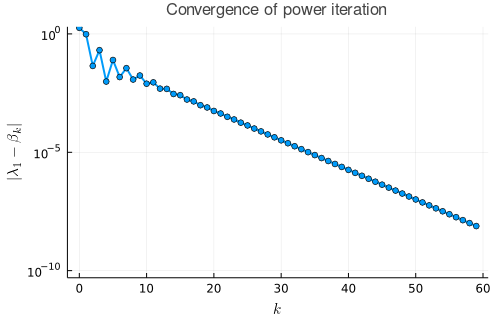

In [9]:
err = @. 1 - β
plot(0:59,abs.(err),m=:o,title="Convergence of power iteration",
    xlabel=L"k",yaxis=(L"|\lambda_1-\beta_k|",:log10,[1e-10,1]))

The asymptotic trend seems to be a straight line, consistent with linear convergence. To estimate the convergence rate, we look at the ratio of two consecutive errors in the linear part of the convergence curve. The ratio of the first two eigenvalues should match the observed rate.

In [10]:
@show theory = λ[2]/λ[1];
@show observed = err[40]/err[39];

theory = λ[2] / λ[1] = -0.75
observed = err[40] / err[39] = -0.7505804799199765


Note that the error is supposed to change sign on each iteration. The effect of these alternating signs is that estimates oscillate around the exact value.

In [11]:
β[26:30]

5-element Vector{Float64}:
 1.0001362923884616
 0.9998992158824787
 1.0000764485393467
 0.999943179638739
 1.0000429247061229

In practical situations, we don't know the exact eigenvalue that the algorithm is supposed to find. In that case we would base errors on the final $\beta$ that was found, as in the following plot.

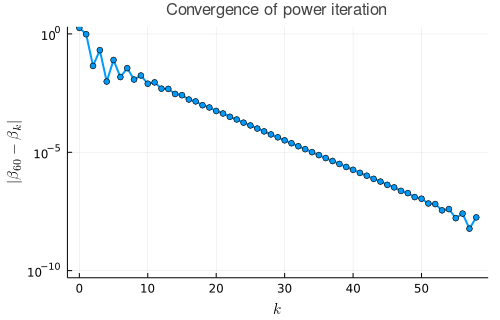

In [12]:
err = @. β[end] - β[1:end-1]
plot(0:58,abs.(err),m=:o,title="Convergence of power iteration",
    xlabel=L"k",yaxis=(L"|\beta_{60}-\beta_k|",:log10,[1e-10,1]))

The results are very similar until the last few iterations, when the limited accuracy of the reference value begins to show. That is, while it is a good estimate of $\lambda_1$, it is less good as an estimate of the error in nearby estimates.
```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```


The practical utility of {eq}`poweriterconv` is limited because if we knew $\lambda_1$ and $\lambda_2$, we wouldn't be running the power iteration in the first place! Sometimes it's possible to find estimates of or bounds on the ratio. If nothing else, though, it is useful to know that linear convergence is expected at a rate based solely on the dominant eigenvalues. 

## Exercises

1. ⌨ Use {numref}`Function {number} <function-poweriter>` to perform 20 power iterations for the following matrices. Quantitatively compare the observed convergence to the prediction in {eq}`poweriterconv`.

    **(a)**
    $\mathbf{A} = \begin{bmatrix}
      1.1 & 1 \\
      0.1 & 2.4
    \end{bmatrix} \quad$
    **(b)** $\mathbf{A} = \begin{bmatrix}
      2 & 1 \\
      1 & 0
    \end{bmatrix} \quad$
    **(c)** $ \mathbf{A} = \begin{bmatrix}
      6 & 5 & 4 \\
      5 & 4 & 3 \\
      4 & 3 & 2
    \end{bmatrix}$

    **(d)** $\mathbf{A} = \begin{bmatrix}
    8 & -14 & 0 & -14 \\
    -8 & 1 & 1 & 1 \\
    -4 & -2 & 0 & 2 \\
    8 & -7 & -1 & -7 
    \end{bmatrix}$

2. ✍ Describe what happens during power iteration using the matrix $\mathbf{A}= \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$ and initial vector $\mathbf{x}=\begin{bmatrix} 0.4\\0.7 \end{bmatrix}$. Does the algorithm converge to an eigenvector? How does this relate to {eq}`powerAkx0`?

    (problem-power-lumpmembraneeig)=
3. ⌨  In  [Exercise 2.3.5](problem-linear-systems-lumpstring) we considered a mass-lumped model of a hanging string that led to a tridiagonal system of linear equations. Then, in [Exercise 7.2.6](problem-evd-lumpstring), we found that eigenvectors of the same matrix correspond to vibrational modes of the string. The same setup can be applied to a membrane hanging from a square frame. Lumping the mass onto a Cartesian grid, each interacts with the four neighbors to the north, south, east, and west. If $n$ masses are used in each coordinate direction, we get an $n^2\times n^2$ sparse matrix $\mathbf{A}$ that can be constructed by `FNC.poisson(n)`.
   
    **(a)** Let $n=10$ and make a `spy` plot of $\mathbf{A}$. What is the density of $\mathbf{A}$? Most rows all have the same number of nonzeros; find this number.
  
    **(b)** Find the dominant $\lambda_1$ using `eigs` for $n=10,15,20,25$.
    
    **(c)** For each $n$ in part (b), apply 100 steps of {numref}`Function {number} <function-poweriter>`. On one graph, plot the four convergence curves $|\beta_k-\lambda_1|$ using a semi-log scale. (They will not be smooth curves because this matrix has many repeated eigenvalues that complicate the convergence analysis.) 

4. ⌨ Copy the instructions from [Exercise 8.1.5](problem-structure-actorsmat) to obtain a large, sparse matrix $\mathbf{A}$. Use {numref}`Function {number} <function-poweriter>` to find the leading eigenvalue of $\mathbf{A}^T\mathbf{A}$ to at least six significant digits.

5. ⌨ For symmetric matrices, the Rayleigh quotient {eq}`rayleigh` converts an $O(\epsilon)$ eigenvector estimate into an $O(\epsilon^2)$ eigenvalue estimate. Duplicate {numref}`Function {number} <function-poweriter>` and rename it to `powersym`. Modify the new function to use the Rayleigh quotient to produce the entries of `β`. Your function should not introduce any additional matrix-vector multiplications. Apply the original {numref}`Function {number} <function-poweriter>` and the new `powersym` on the matrix `matrixdepot("fiedler",100)`, plotting the convergence curves on one graph.